        Дата  Количество единиц  Курс марки ФРГ
0 1961-01-01                100           21.61
1 1961-02-01                100           21.60
2 1961-03-01                100           21.58
3 1961-04-01                100           22.67
4 1961-05-01                100           22.70


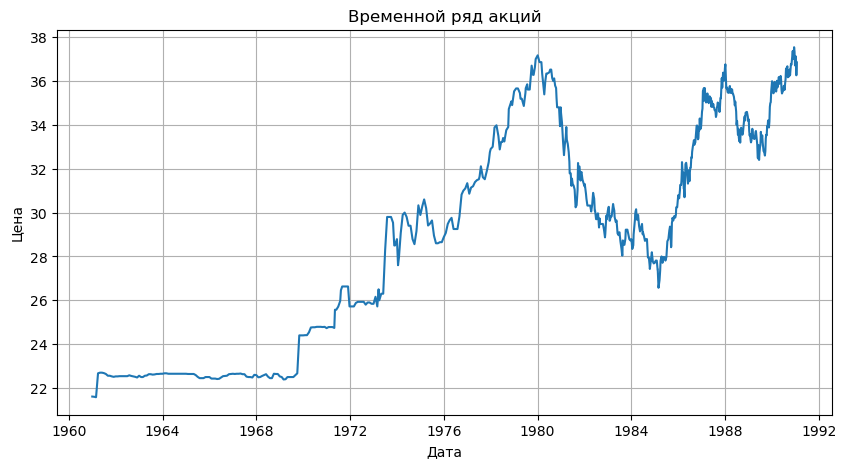

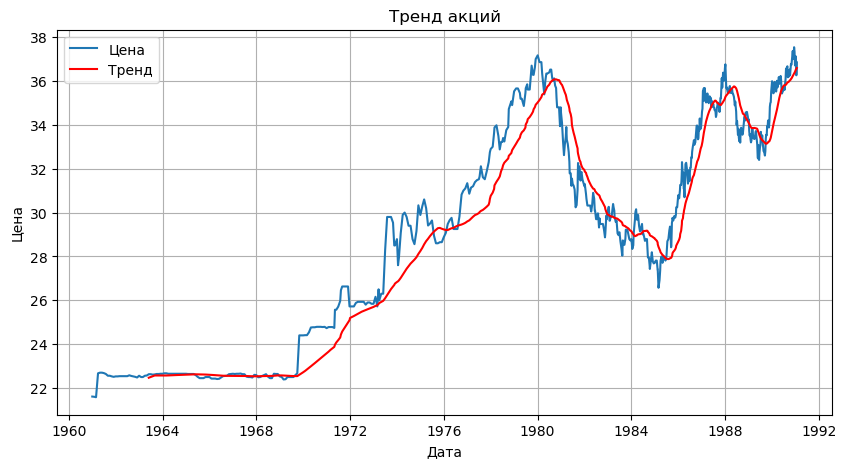

                            OLS Regression Results                            
Dep. Variable:         Курс марки ФРГ   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     975.3
Date:                Thu, 03 Oct 2024   Prob (F-statistic):          1.29e-131
Time:                        00:19:37   Log-Likelihood:                -1591.9
No. Observations:                 654   AIC:                             3188.
Df Residuals:                     652   BIC:                             3197.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.5622      0.231    106.354      0.0

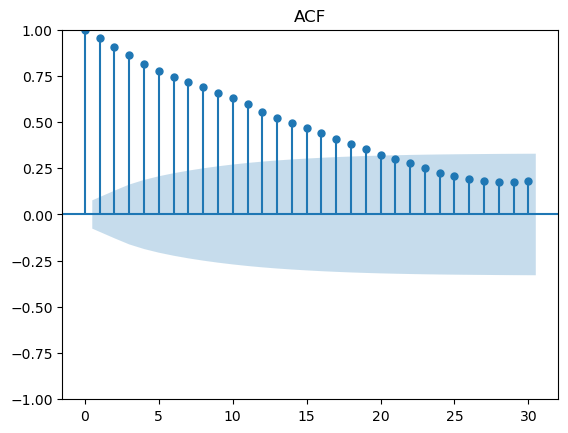

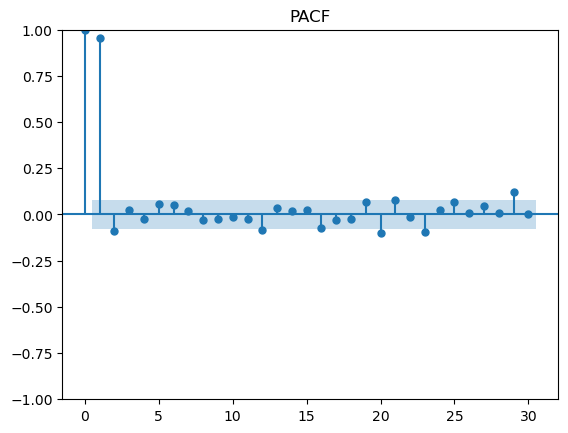

C:\Users\linar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\linar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\linar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\linar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

                               SARIMAX Results                                
Dep. Variable:         Курс марки ФРГ   No. Observations:                  684
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -221.492
Date:                Thu, 03 Oct 2024   AIC                            448.984
Time:                        00:19:37   BIC                            462.568
Sample:                             0   HQIC                           454.241
                                - 684                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.8662      4.637      6.225      0.000      19.778      37.955
ar.L1          0.9986      0.003    350.760      0.000       0.993       1.004
sigma2         0.1109      0.004     31.152      0.0

C:\Users\linar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\linar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\linar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [3]:

import pandas as pd

# Загрузка данных из Excel
data = pd.read_excel('германия.xlsx')  # Укажите путь к вашему Excel файлу
print(data.head())


### Шаг 3: Построение временного ряда (графика)


import matplotlib.pyplot as plt

# Предположим, что у вас есть колонки 'Date' и 'Price'
data['Дата'] = pd.to_datetime(data['Дата'])  # Преобразование столбца дат в формат datetime
data.set_index('Дата', inplace=True)  # Установка даты в качестве индекса

# Построение временного ряда
plt.figure(figsize=(10, 5))
plt.plot(data['Курс марки ФРГ'])
plt.title('Временной ряд акций')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.grid()
plt.show()


### Шаг 4: Построение тренда



# Скользящая средняя
data['Trend'] = data['Курс марки ФРГ'].rolling(window=30).mean()  # Для 30-дневной скользящей средней

plt.figure(figsize=(10, 5))
plt.plot(data['Курс марки ФРГ'], label='Цена')
plt.plot(data['Trend'], label='Тренд', color='red')
plt.title('Тренд акций')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()
plt.grid()
plt.show()


### Шаг 5: Проверка адекватности тренда




import statsmodels.api as sm

# Добавим константу
X = sm.add_constant(range(len(data)))
model = sm.OLS(data['Курс марки ФРГ'][30:], X[30:])  # Идем с 30-й точки, чтобы учесть скользящую среднюю
results = model.fit()

# Результаты
print(results.summary())


### Шаг 6: Проверка на стационарность ряда остатков




from statsmodels.tsa.stattools import adfuller

# Остатки
data['Residuals'] = data['Курс марки ФРГ'] - data['Trend']
result = adfuller(data['Residuals'].dropna())  # Убираем NaN

# Результаты ADF теста
print('ADF Statistic:', result[0])
print('p-value:', result[1])


### Шаг 7: Построение коррелограммы



from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Коррелограммы
plot_acf(data['Residuals'].dropna(), lags=30)
plt.title('ACF')
plt.show()

plot_pacf(data['Residuals'].dropna(), lags=30)
plt.title('PACF')
plt.show()


### Шаг 8: Определение типа авторегрессивной модели


### Шаг 9: Построение моделей AR(1), AR(2), ARMA(1,1)


from statsmodels.tsa.arima.model import ARIMA

# AR(1)
ar1_model = ARIMA(data['Курс марки ФРГ'], order=(1, 0, 0)).fit()
print(ar1_model.summary())

# AR(2)
ar2_model = ARIMA(data['Курс марки ФРГ'], order=(2, 0, 0)).fit()
print(ar2_model.summary())

# ARMA(1,1)
arma_model = ARIMA(data['Курс марки ФРГ'], order=(1, 0, 1)).fit()
print(arma_model.summary())


### Шаг 10: Выбор наилучшей модели по критериям AIC и BIC:


print('AIC for AR(1):', ar1_model.aic)
print('AIC for AR(2):', ar2_model.aic)
print('AIC for ARMA(1,1):', arma_model.aic)

print('BIC for AR(1):', ar1_model.bic)
print('BIC for AR(2):', ar2_model.bic)
print('BIC for ARMA(1,1):', arma_model.bic)